In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit

In [2]:
def twi_minus_loglikelihood(parameter):
    A,f_b,alpha_H,poisson = parameter
    alpha_L = 1.0
    
    perdata092 = pd.read_csv("perlist092.csv")
    f = perdata092['f']
    per = perdata092['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata092)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
bnds=(0.001,0.1),(1.0E-5,1.0E-3),(2.0,5.0),(0,2)
minimizer_kwargs = {"bounds":(bnds)}
x0=[0.005,1.7E-4,3.8,0.8]
x0_array=np.array(x0)
m = minimize(twi_minus_loglikelihood,x0_array,method = 'TNC', bounds=bnds)

# m = basinhopping(twi_minus_loglikelihood,x0_array,minimizer_kwargs=minimizer_kwargs)

2456.9553144501824
2456.9553144501824
2456.955177528158
2456.9515544814317
2456.9553146538133
2456.955302804358
2456.955250059313
2456.955250059313
2456.9551131373746
2456.9514900922904
2456.9552502629467
2456.95523841349
2456.9551590652345
2456.9551590652345
2456.9550221432974
2456.9513990990704
2456.955159268866
2456.955147419416
2244.945096064591
2244.945096064591
2244.945115623181
2244.94808651516
2244.9450959409087
2244.9450954468252
2244.9450956607475
2244.9450956607475
2244.9451152193287
2244.9480861112993
2244.9450955370667
2244.9450950429837
2244.9450935939044
2244.9450935939044
2244.9451131524884
2244.948084044349
2244.9450934702213
2244.9450929761356
2243.5097804790607
2243.5097804790607
2243.5097986641103
2243.512702704154
2243.509780360101
2243.5097798841057
2236.9677468165837
2236.9677468165837
2236.9677576142203
2236.970176240876
2236.9677467283495
2236.967746328976
2959.5132904387247
2959.5132904387247
2959.512970398755
2958.5739087250677
2959.51329571936
2959.513286858

2223.8400997539793
2223.8394280427
2223.8394280427
2223.839426919825
2223.839334409081
2223.8394280403677
2223.8394280141224
2223.8394280264506
2223.8394280264506
2223.839426903577
2223.8393343928324
2223.8394280241255
2223.8394279978747
2223.8394279019853
2223.8394279019853
2223.839426779108
2223.839334268343
2223.8394278996507
2223.8394278734013
2223.8265550286014
2223.8265550286014
2223.826553924113
2223.826459275495
2223.8265550267206
2223.8265549971934
2223.7676699377844
2223.7676699377844
2223.7676689070586
2223.767552314394
2223.7676699385984
2223.7676698920204
2228.281972205481
2228.281972205481
2228.28196753438
2228.2702599431327
2228.281972606654
2228.2819716734825
2223.920392454892
2223.920392454892
2223.9203905946865
2223.9179974648523
2223.9203925623337
2223.920392200303
2223.6040635990767
2223.6040635990767
2223.604062482946
2223.603334360844
2223.604063635218
2223.6040634559104
2223.604062474103
2223.604062474103
2223.6040613579785
2223.603333246854
2223.604062510244
222

In [4]:
print (m)

# L-BFGS-B  2224.280060572952
# TNC       2223.416667702583
# SLSQP     2256.8576588636633

     fun: 2223.416667702583
     jac: array([-1.17207492e+01,  3.08021434e+04, -6.94262781e-01, -2.54867700e+00])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 14
  status: 3
 success: False
       x: array([3.29564223e-02, 4.49170597e-05, 2.80394335e+00, 1.27547021e+00])


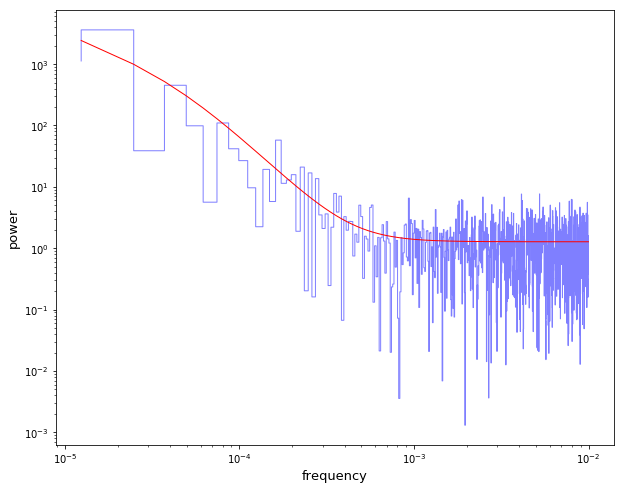

In [5]:
perdata092 = pd.read_csv("perlist092.csv")
f = perdata092['f']
per = perdata092['per']

alpha_L = 1.0
parameter = m.x
A,f_b,alpha_H,poisson = parameter

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [6]:
def twi_minus_loglikelihood_nobreak(parameter):
    A,alpha,poisson = parameter
    alpha_L = 1.0
    
    perdata092 = pd.read_csv("perlist092.csv")
    f = perdata092['f']
    per = perdata092['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*A+poisson)
     
    
    length = len(perdata092)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [7]:
bnds=(0.00000001,0.1),(1.0,4.0),(0,2)
minimizer_kwargs = {"bounds":(bnds)}
x1=[1.0E-5,2.0,1.0]
x1_array=np.array(x1)
n = minimize(twi_minus_loglikelihood_nobreak,x1_array,method = 'L-BFGS-B', bounds=bnds)

2673.8501580521106
2674.167453288073
2673.850180381054
2673.8501585876243
1069237079.5412601
534609312.6273003
1069237022.976253
1062466203.230785
2516.820669697298
2516.6689346360663
2516.820662726482
2516.820654926941
2342.24616691311
2342.419779441937
2342.246172360105
2342.2461624834837
3437.751606225427
2956.2967938154034
3437.7515191955004
3437.751596476463
2321.329522892146
2321.5786531738595
2321.3295279361864
2321.3295189840624
2280.244965296353
2280.389767553867
2280.2449663295038
2280.2449614309126
2295.4314504648432
2293.3385798377817
2295.4314448074088
2295.431446101777
2277.464857297299
2277.4060105158037
2277.464856976256
2277.464853336112
2288.7234986144126
2238.3419712925684
2288.723489149228
2288.723498139863
2255.4030468652722
2257.355319202858
2255.403051319777
2255.4030459591595
2458.394625970145
2331.0567465901504
2458.3946037023366
2458.394623596669
2240.186497003809
2242.023479481423
2240.186499710667
2240.1864960632206
2232.503937144969
2231.1850603095886
2232.

In [8]:
print (n)

# L-BFGS-B  2224.114952604582
# TNC       2264.4130069190483

      fun: 2224.114952604582
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.76843864e+08, -2.40793270e+00,  6.07992661e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 384
      nit: 20
   status: 0
  success: True
        x: array([2.13688862e-08, 2.33503119e+00, 1.27195840e+00])


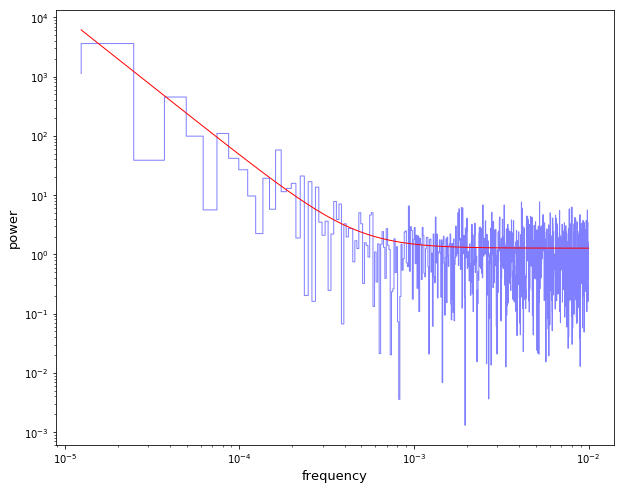

In [9]:
parameter2 = n.x
A,alpha,poisson = parameter2

model2 = []
f_length = len(f)
for i in range(f_length):
    model2.append((f[i]**(-alpha))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model2, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()